In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
import re
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn
import matplotlib.pyplot as plt
import pickle
import urllib.request
import requests
from bs4 import BeautifulSoup

# Tickers

In [ ]:
#import tickers
ticker30 = []

# 打開文件
fo = open("30ticker.txt", "r")
 
for line in fo.readlines():
    line = line.strip()  
    ticker30.append(line)
ticker30

# Tickers_URL

In [ ]:
with open('company_ft_dic_final.pkl','rb') as f:
    dic = pickle.load(f)
#這樣一來財報的連結會被放到dic中
#dic格式：{tickers:[相關財報網址]}

tic_url = []
for j in range(30):
    tic_url.append(dic[ticker30[j]])
tic_url

# Crawl 10Q and Cut and Save

In [ ]:
FR = []
count = 0
for i in range(30):
    print(i)
    for j in range (0, len(tic_url)):
        try:
            print("j=")
            print(j)
            url=tic_url[i][j]
            res = requests.get(url)
            soup = BeautifulSoup(res.text, 'html.parser')
            soup_txt = soup.get_text().lower()
            startnum = soup_txt.count("item 2.")
            print('startnum'+str(startnum))
            if(j==0):
                if(startnum==0):
                    break
                elif(startnum==3):
                    break
                elif(startnum==1):
                    break
            if(startnum== 4):   
                start = soup_txt.find("item 2.")
                for l in range(2):
                    start = soup_txt.find("item 2.",start+1)
                for k in range(1):
                    end = soup_txt.find('item 3.',start)
            elif(startnum== 2):   
                start = soup_txt.find("item 2.")
                #for l in range(1):
                #   start = soup_txt.find("item 2.",start+1)
                for k in range(1):
                    end = soup_txt.find('item 3.',start)
            else:
                continue
            FR.append(soup_txt[start:end])
            f = open('./10Q/'+str(i)+'_'+str(j)+'.txt','a')
            f.write(FR[count])
            count+=1
        except:
            continue

# Tokenization

In [2]:
#import data
FRnum = []
fa = open('FRnum.txt')
for  line in  fa.readlines(): 
    FRnum.append(line.strip())
len(FRnum)
FR = []
dir_name = './10Q/'
for index in FRnum:
    with open(dir_name+index+'.txt') as f:
        raw = f.read()
    FR.append(raw)
num_doc = len(FR)
num_doc

233

In [3]:
def tokenizer(corpus):
    #lowercasing
    corpus = [doc.strip().lower() for doc in corpus]
    
    #words tokenization/punctuation removal
    tokenizer_1 = RegexpTokenizer(r'\w+')
    corpus = [tokenizer_1.tokenize(doc) for doc in corpus]
    
    #stopword removal
    #stemming using Porter’s algorithm
    sort_out = []
    i = 0
    for doc in corpus:
        print(i)
        i+=1
        tmp = ""
        for word in doc:
            if word not in stopwords.words('english') and len(word)>1 and word.isalpha():
                word = PorterStemmer().stem(word)
                tmp+=(" "+word)
        sort_out.append(tmp)

    return sort_out



num_doc = len(FR)
#tokenization
FR = tokenizer(FR)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232


# Build ID & Term matrix

In [4]:
vectorizer = CountVectorizer()
X = (vectorizer.fit_transform(FR))
num=X.toarray()
print(vectorizer.get_feature_names())
print(num)

['aa', 'aaa', 'aaac', 'aafi', 'aag', 'aaht', 'aaja', 'aaknw', 'aam', 'aanx', 'aao', 'aapp', 'aaq', 'aardoli', 'aastabl', 'aastablemay', 'aastableoctob', 'aat', 'aav', 'aay', 'ab', 'abandon', 'abbawm', 'abbrevi', 'abbvi', 'abc', 'abd', 'abdw', 'aberdeen', 'abf', 'abhr', 'abi', 'abil', 'abk', 'abl', 'abnorm', 'abp', 'abroad', 'absenc', 'absent', 'absolut', 'absorb', 'abstain', 'abstract', 'abu', 'abuja', 'abus', 'abx', 'ac', 'aca', 'acb', 'acced', 'acceler', 'accept', 'access', 'accessori', 'accessorieswear', 'accident', 'accommod', 'accompani', 'accord', 'accordingli', 'account', 'accountingon', 'accret', 'accru', 'accrual', 'accrualbal', 'accruedin', 'accumul', 'accumulatedothercomprehensiveincomememb', 'accur', 'accuraci', 'acf', 'ach', 'achiev', 'acid', 'acip', 'acknowledg', 'acl', 'acm', 'aco', 'acompar', 'aconsum', 'acq', 'acqt', 'acquir', 'acquisit', 'acquisitio', 'acreag', 'acromegali', 'acronym', 'across', 'act', 'action', 'actionr', 'actionratingoutlookmoodi', 'activ', 'activit

In [19]:
X

<233x13431 sparse matrix of type '<class 'numpy.int64'>'
	with 158622 stored elements in Compressed Sparse Row format>

In [124]:
column_name = vectorizer.get_feature_names()
lowf = []
for i in range(X.shape[1]):
    count = 0
    count2 = 0
    for j in range(num_doc):
        count+=num[j][i]
        if(num[j][i]!=0):
            count2+=1
    if( count2<60 or count2>111 or count> 100):
        lowf.append(int(i))
len(lowf)

13065

In [125]:
#int to 0,1 
for i in range(num_doc):
    for j in range(len(num[i])):
        if num[i][j]>0:
            num[i][j]=1
num

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Build Dataframe

In [126]:
df =pd.DataFrame(num,index=np.arange(num_doc),columns=vectorizer.get_feature_names())

In [127]:
for i in lowf:
    df = df.drop(str(column_name[int(i)]),axis = 1)

In [128]:
df

,aa,abl,acceler,accompani,accru,accrual,accumul,achiev,act,ad,...,virtual,volatil,weaken,websit,weight,wide,without,word,write,www
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,1,1,0,1,0,1
1,0,0,0,1,0,1,0,0,1,1,...,0,0,0,1,1,1,1,1,0,1
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,1,1,1,1,0,1
3,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,1,1,1,1,0,1
4,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,1,1,1,1,0,1
5,0,0,1,1,0,0,0,0,1,1,...,0,0,0,1,1,1,1,1,0,1
6,0,0,1,1,0,0,0,0,1,1,...,0,0,0,1,1,1,1,1,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,1,0,1,1,...,1,1,1,1,0,0,0,0,1,1


# Co-occurence Matrix

In [129]:
df_asint = df.astype(int)
coocc = df_asint.T.dot(df_asint)
cooccurrence_matrix_diagonal = np.diagonal(coocc)
with np.errstate(divide='ignore', invalid='ignore'):
    cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(coocc, cooccurrence_matrix_diagonal[:, None]))
print(cooccurrence_matrix_percentage)

[[1.         0.66129032 0.48387097 ... 0.69354839 0.80645161 0.62903226]
 [0.55405405 1.         0.45945946 ... 0.47297297 0.55405405 0.41891892]
 [0.35714286 0.4047619  1.         ... 0.55952381 0.35714286 0.54761905]
 ...
 [0.671875   0.546875   0.734375   ... 1.         0.5625     0.890625  ]
 [0.81967213 0.67213115 0.49180328 ... 0.59016393 1.         0.55737705]
 [0.55714286 0.44285714 0.65714286 ... 0.81428571 0.48571429 1.        ]]


In [130]:
df.columns

Index(['aa', 'abl', 'acceler', 'accompani', 'accru', 'accrual', 'accumul',
       'achiev', 'act', 'ad',
       ...
       'virtual', 'volatil', 'weaken', 'websit', 'weight', 'wide', 'without',
       'word', 'write', 'www'],
      dtype='object', length=366)

In [131]:
df_2 =pd.DataFrame(cooccurrence_matrix_percentage,index=df.columns,columns=df.columns)
df_2

,aa,abl,acceler,accompani,accru,accrual,accumul,achiev,act,ad,...,virtual,volatil,weaken,websit,weight,wide,without,word,write,www
aa,1.000000,0.661290,0.483871,0.612903,0.693548,0.596774,0.387097,0.596774,0.483871,0.241935,...,0.338710,0.806452,0.322581,0.096774,0.419355,0.725806,0.629032,0.693548,0.806452,0.629032
abl,0.554054,1.000000,0.459459,0.513514,0.621622,0.459459,0.378378,0.540541,0.594595,0.445946,...,0.581081,0.554054,0.405405,0.378378,0.445946,0.621622,0.540541,0.472973,0.554054,0.418919
acceler,0.357143,0.404762,1.000000,0.535714,0.654762,0.547619,0.630952,0.464286,0.678571,0.488095,...,0.333333,0.380952,0.535714,0.285714,0.821429,0.750000,0.666667,0.559524,0.357143,0.547619
accompani,0.567164,0.567164,0.671642,1.000000,0.895522,0.791045,0.492537,0.597015,0.656716,0.417910,...,0.537313,0.462687,0.477612,0.253731,0.597015,0.671642,0.880597,0.850746,0.492537,0.761194
accru,0.452632,0.484211,0.578947,0.631579,1.000000,0.557895,0.568421,0.494737,0.631579,0.473684,...,0.536842,0.547368,0.568421,0.336842,0.557895,0.600000,0.673684,0.600000,0.452632,0.652632
accrual,0.606557,0.557377,0.754098,0.868852,0.868852,1.000000,0.606557,0.622951,0.737705,0.442623,...,0.491803,0.459016,0.524590,0.229508,0.704918,0.786885,0.852459,0.901639,0.491803,0.803279
accumul,0.363636,0.424242,0.803030,0.500000,0.818182,0.560606,1.000000,0.515152,0.727273,0.606061,...,0.469697,0.469697,0.803030,0.212121,0.772727,0.848485,0.742424,0.545455,0.409091,0.545455
achiev,0.506849,0.547945,0.534247,0.547945,0.643836,0.520548,0.465753,1.000000,0.547945,0.452055,...,0.369863,0.479452,0.506849,0.232877,0.452055,0.739726,0.794521,0.561644,0.534247,0.479452
act,0.333333,0.488889,0.633333,0.488889,0.666667,0.500000,0.533333,0.444444,1.000000,0.488889,...,0.400000,0.377778,0.477778,0.477778,0.566667,0.733333,0.588889,0.488889,0.377778,0.455556
ad,0.166667,0.366667,0.455556,0.311111,0.500000,0.300000,0.444444,0.366667,0.488889,1.000000,...,0.488889,0.277778,0.533333,0.588889,0.488889,0.500000,0.555556,0.300000,0.222222,0.366667


# Output File

In [132]:
df_2.to_csv('co-occurancy_matrix_keywords_df60_111.csv')

# Heat Map

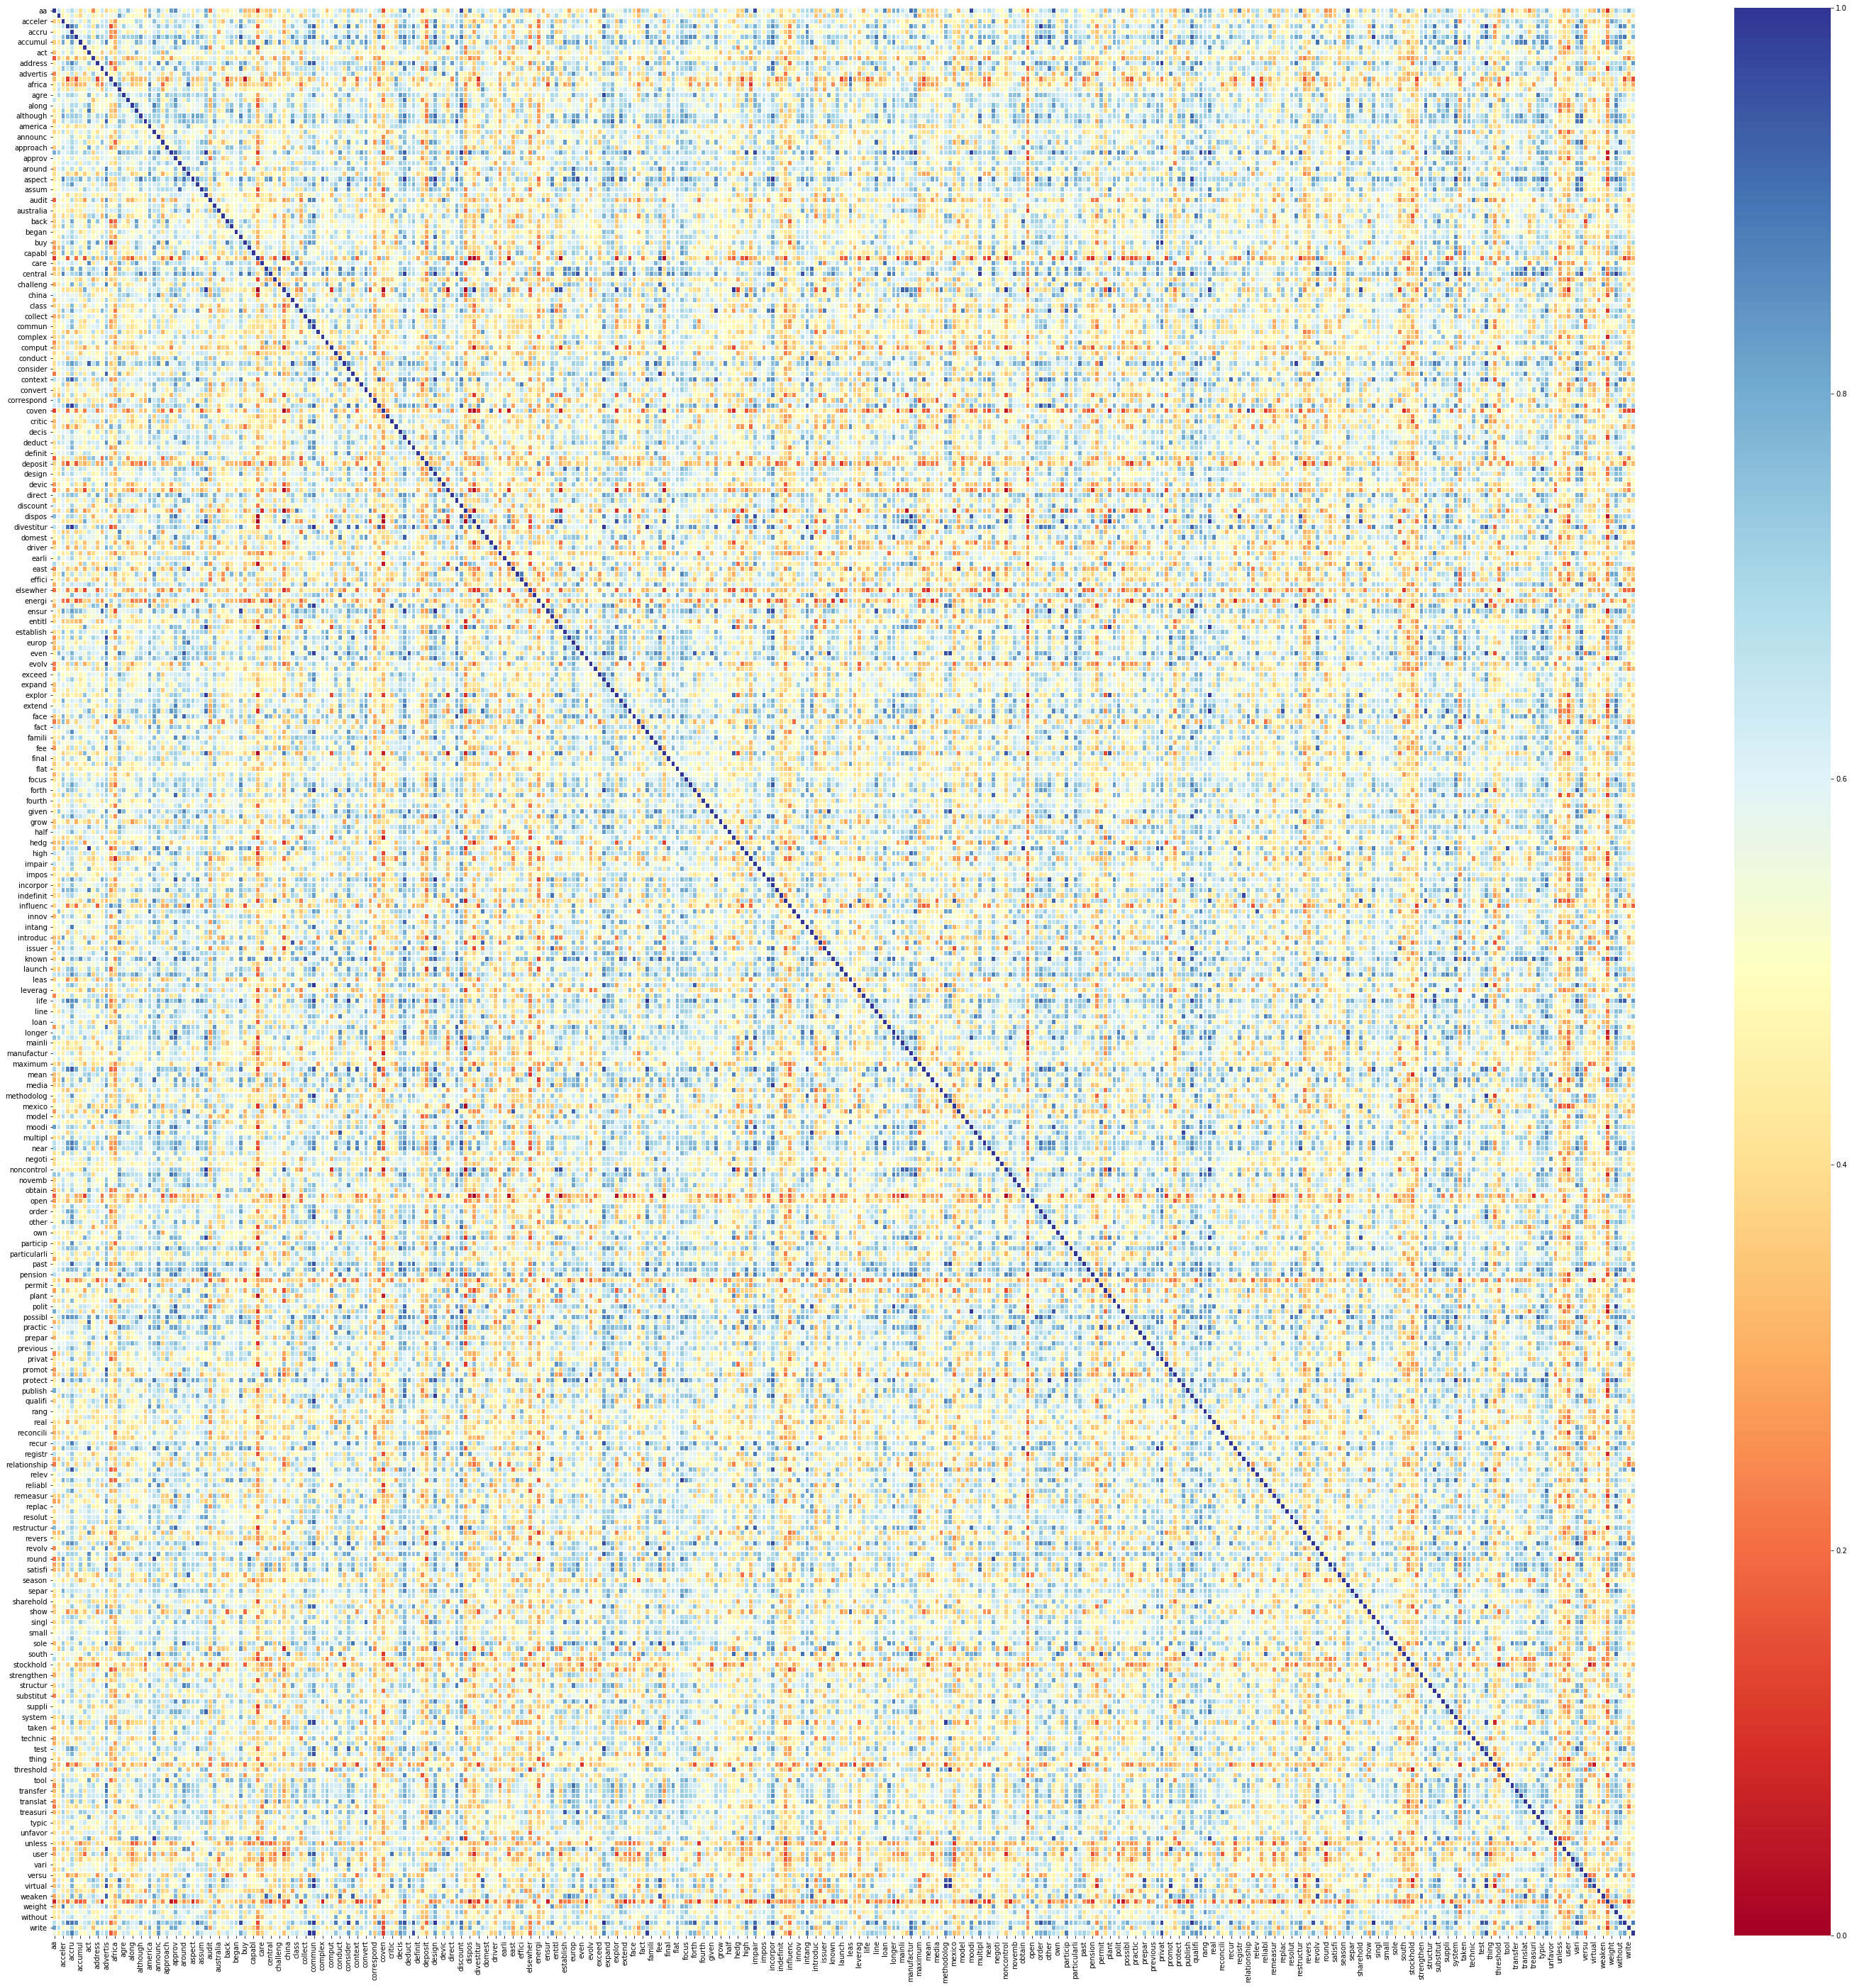

In [133]:
plt.figure(figsize=(50,50))
sn.heatmap(df_2,linewidths=0.25,linecolor='white',cmap='RdYlBu')
plt.savefig("map.png")
plt.show()